In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
crime = pd.read_csv('/home/sushil/Documents/Assingment/Clust-Ass7/crime_data.csv')

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [5]:
def_norm = norm_fun(crime.iloc[:,1:])

In [7]:
def_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [8]:
type(def_norm)

pandas.core.frame.DataFrame

In [10]:
k=list(range(2,20))
k
TWSS=[]
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(def_norm)
    WSS=[]
    for j in range(i):
        WSS.append(sum(cdist(def_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,def_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x7f26569a4340>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

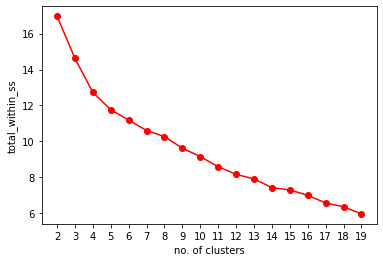

In [12]:
plt.plot(k,TWSS,'ro-');plt.xlabel("no. of clusters");plt.ylabel("total_within_ss");plt.xticks(k)

In [13]:
model=KMeans(n_clusters=5)

In [14]:
model

KMeans(n_clusters=5)

In [15]:
model.fit(def_norm)

KMeans(n_clusters=5)

In [16]:
model.labels_

array([1, 2, 2, 4, 2, 2, 0, 4, 2, 1, 0, 3, 2, 4, 3, 4, 4, 1, 3, 2, 0, 2,
       3, 1, 4, 4, 4, 2, 3, 0, 2, 2, 1, 3, 0, 4, 4, 0, 0, 1, 3, 1, 2, 0,
       3, 4, 0, 3, 3, 4], dtype=int32)

In [17]:
df=pd.Series(model.labels_)

In [19]:
df.head()

0    1
1    2
2    2
3    4
4    2
dtype: int32

In [20]:
crime['clust']=df

In [21]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,2


In [ ]:
crime.iloc[:,2:].groupby(cri.clust).mean()